In [1]:
# DON'T CHANGE THIS
# DON'T 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

y = np.random.randint(2, size=(100, 1))          # Generating random labels
y_preds = np.random.uniform(0, 1, size=(100, 1)) # Generating random predictions

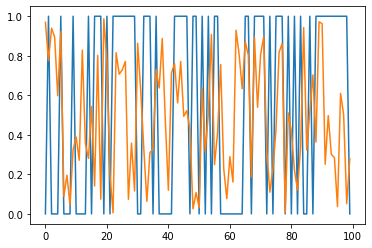

In [2]:
# DON'T CHANGE THIS
import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(y_preds)



In [3]:
def Get_Confusion_Matrix(thersh , y , y_preds):
    y = np.multiply(y, 1)
    y_pre = np.where( y_preds > thersh , 1 , 0)
    TP = ((y == 1) & (y_pre == 1)).sum()
    TN = ((y == 0) & (y_pre == 0)).sum()
    FP = ((y == 0) & (y_pre == 1)).sum()
    FN = ((y == 1) & (y_pre == 0)).sum()  
    Accuracy = (TP+TN) / (TP + TN +FP+FN) 
    conf_Matrix = np.array([[TP , FP] , [FN , TN]])
    precision = TP / (TP+FP)
    recall = TP /( TP+FN)
    f1_score = 2*((precision * recall)/(precision + recall))
    
    return conf_Matrix,Accuracy,precision,recall,f1_score

In [4]:
thershold = 0.5
result = Get_Confusion_Matrix(thershold , y , y_preds)
print("Accuracy = {} \nprecision = {} \nrecall = {} \nf1_score = {} \n "
      .format(result[1] , result[2] , result[3] , result[4]))
print("Confusion Matrix \n{}".format(result[0]))

Accuracy = 0.54 
precision = 0.6041666666666666 
recall = 0.5178571428571429 
f1_score = 0.5576923076923077 
 
Confusion Matrix 
[[29 19]
 [27 25]]


<ipython-input-3-1029a1c87649>:12: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2*((precision * recall)/(precision + recall))
<ipython-input-3-1029a1c87649>:10: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP+FP)


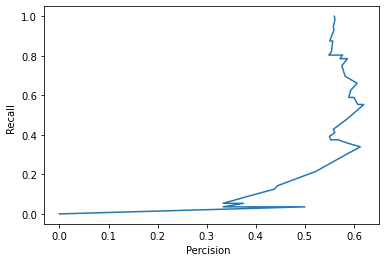

In [5]:
def PLot_Prec_VS_Recall():
    therathold = np.linspace(0,1,50)
    precision_list = []
    recal_list = []
    for i in therathold:
        result = Get_Confusion_Matrix(i , y , y_preds)
        precision_list.append(result[2])
        recal_list.append(result[3])

    plt.plot(precision_list ,recal_list)
    plt.xlabel("Percision  ")
    plt.ylabel("Recall  ")
    plt.show()
    
PLot_Prec_VS_Recall()

In [6]:
from scipy.integrate import simps

In [7]:
def get_FPR_TPR(thersh , y , y_preds):
    y = np.multiply(y, 1)
    y_pre = np.where( y_preds > thersh , 1 , 0)
    TP = ((y == 1) & (y_pre == 1)).sum()
    TN = ((y == 0) & (y_pre == 0)).sum()
    FP = ((y == 0) & (y_pre == 1)).sum()
    FN = ((y == 1) & (y_pre == 0)).sum()
    return (TP /(TP +FN )) , (FP /(TN + FP))

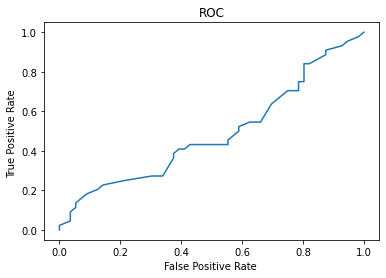

In [8]:
def Plor_ROC(num_of_therh):
    FPR_list = []
    TPR_list = []
    therathold = np.linspace(0,1,num_of_therh)
    for i in therathold:
        result = get_FPR_TPR(i , y , y_preds)
        FPR_list.append(result[0])
        TPR_list.append(result[1])
    plt.plot(FPR_list ,TPR_list)
    plt.title("ROC")
    plt.xlabel("False Positive Rate ")
    plt.ylabel("True Positive Rate ")
    plt.show()

    
Plor_ROC(50)

In [9]:
def get_AUC(thersh):
    Auc = get_FPR_TPR(thersh, y , y_preds)
    
    return ((1+Auc[0]+Auc[1])/2)

In [10]:
print(get_AUC(0.5))

0.9748376623376623
